In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
census_data = pd.read_csv('census.csv')
census_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
census_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education-num     48842 non-null int64
marital-status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    48842 non-null object
income            48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## Checking if there are any null columns

In [5]:
census_data.sum().isnull()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
income            False
dtype: bool

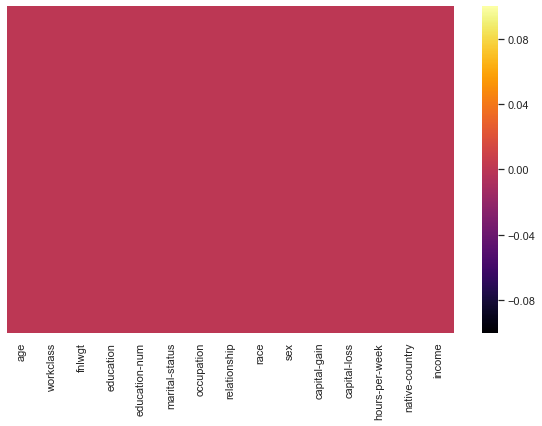

In [6]:
sns.set(rc={'figure.figsize':(10,6)})
sns.heatmap(census_data.isnull(), yticklabels=False ,cmap="inferno")

## Change labels for 'income' as 0 or 1

In [7]:
census_data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [8]:
census_data['income'] = census_data['income'].apply(lambda i: 1 if i=='>50K' else 0)

In [9]:
census_data['income'].unique()

array([0, 1])

In [132]:
# census_data.fillna('0', inplace=True)

# sns.factorplot(x="workclass", y="income", data=census_data, kind="bar")
# plt.xticks(rotation=90);
# census_data['workclass'].value_counts()

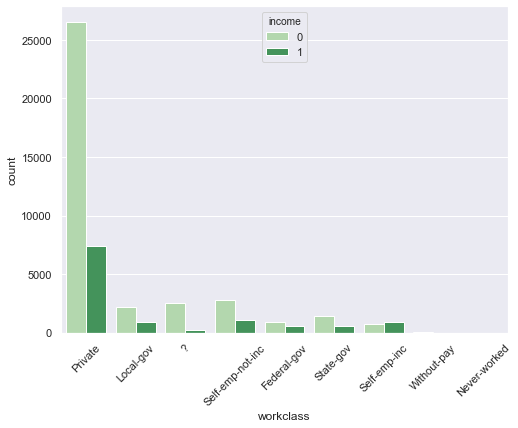

In [10]:
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot(x='workclass', data=census_data, palette='Greens', hue='income')
plt.xticks(rotation=45)
plt.show()

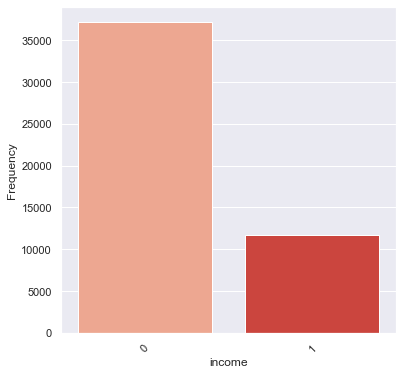

In [11]:
sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(x='income', data=census_data, palette='Reds')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

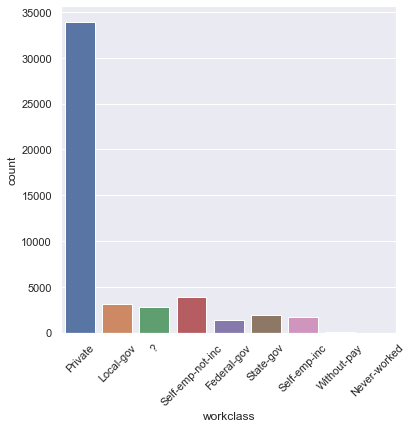

In [12]:
sns.countplot(x="workclass", data=census_data)
plt.xticks(rotation=45)
plt.show()

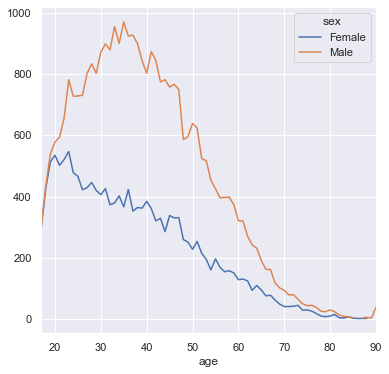

In [13]:
census_data.groupby(['age', 'sex'])['income'].count().unstack().plot(kind='line')

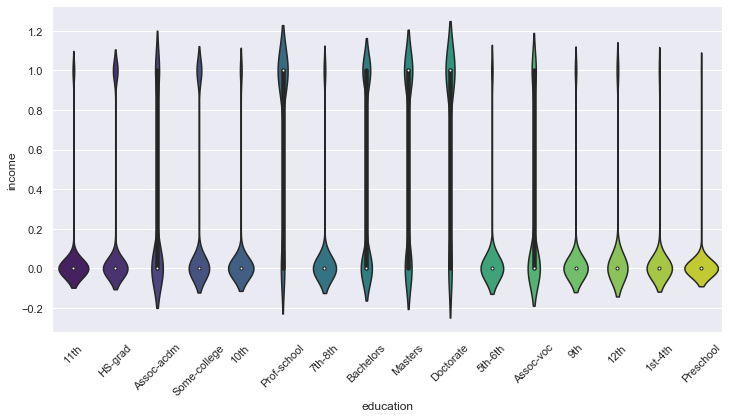

In [14]:
sns.set(rc={'figure.figsize':(12,6)})
sns.violinplot(x="education",y="income",data=census_data, palette = "viridis")
plt.xticks(rotation=45);

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


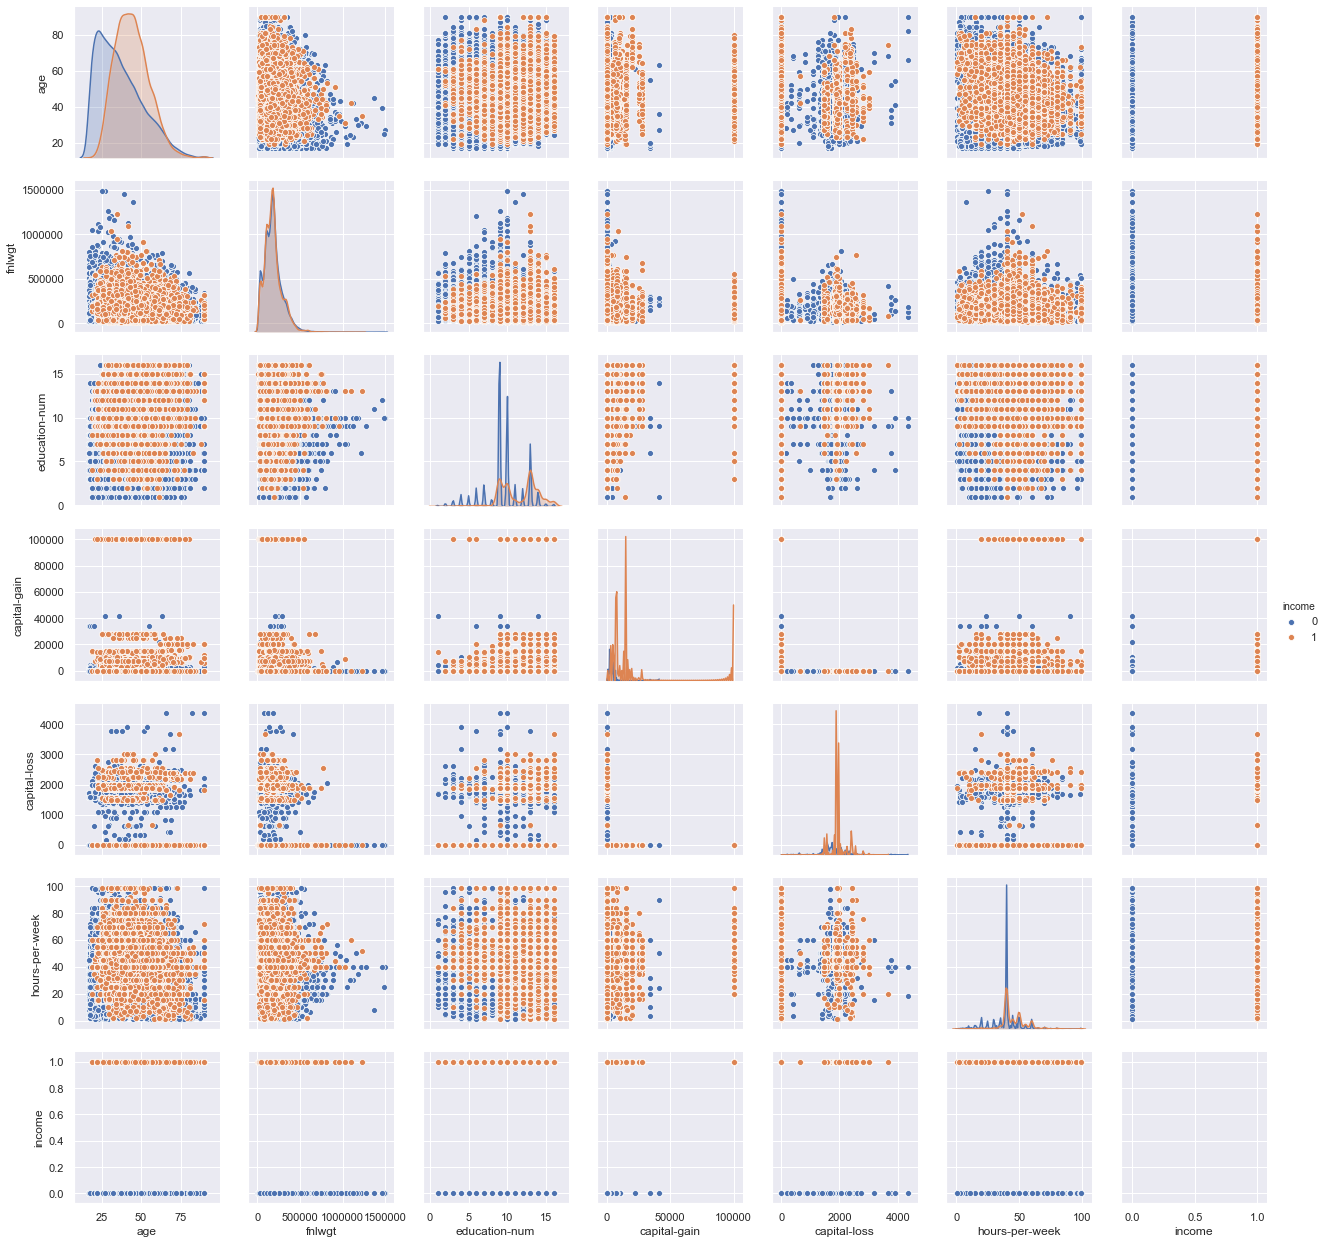

In [15]:
sns.pairplot(census_data, hue='income')

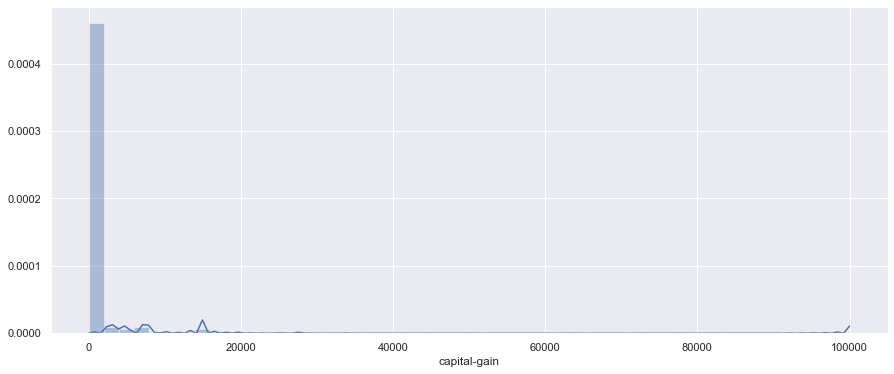

In [20]:
sns.distplot(census_data['capital-gain'])

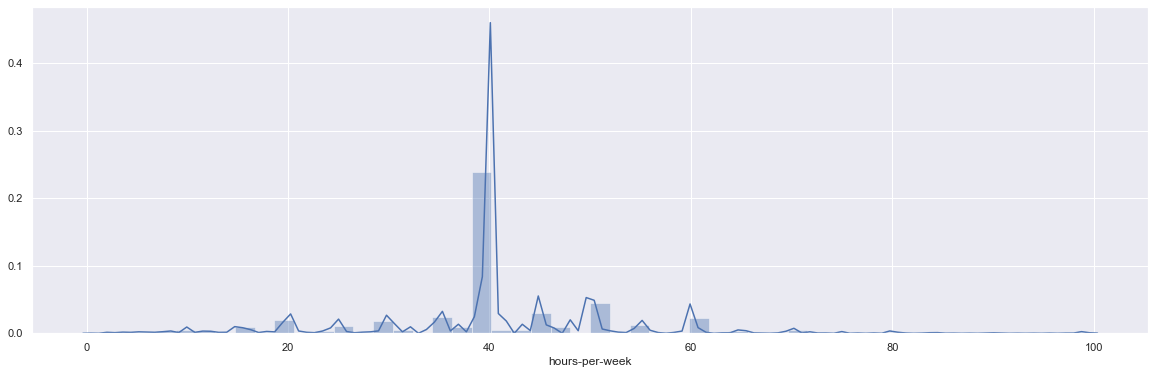

In [58]:
# census_data.groupby(['age', 'hours-per-week'])['income'].count().plot(kind='barh', figsize = (6,6))
sns.distplot(census_data['hours-per-week'])

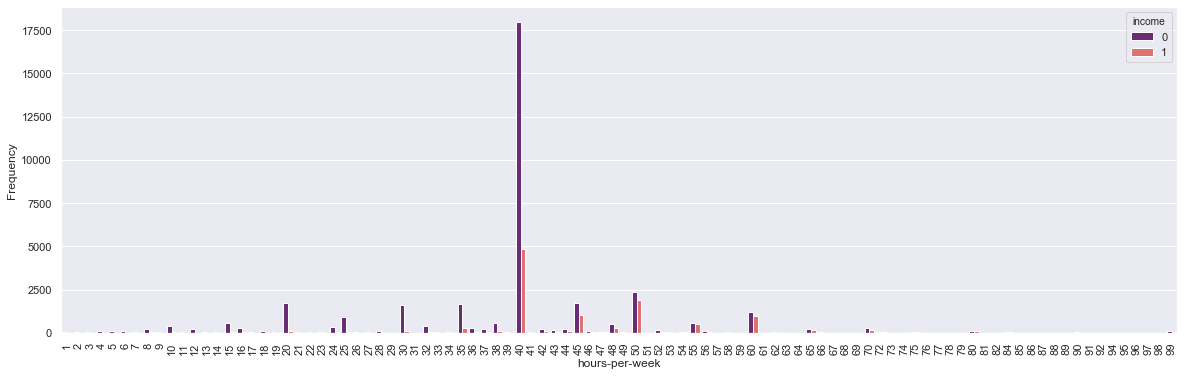

In [57]:
sns.set(rc={'figure.figsize':(20,6)})
sns.countplot(x='hours-per-week', data=census_data, hue='income',palette='magma')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

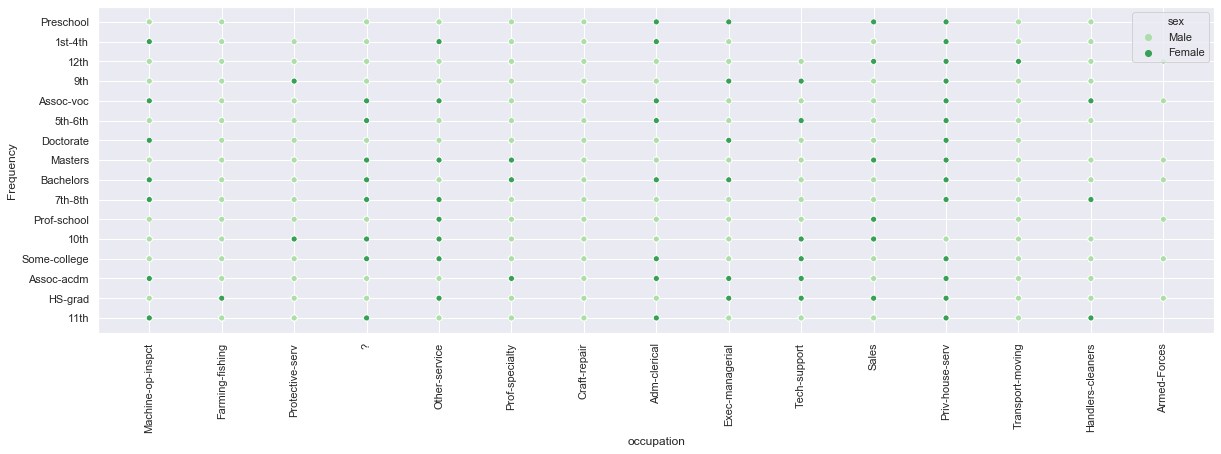

In [60]:
sns.set(rc={'figure.figsize':(20,6)})
sns.scatterplot(x='occupation', y='education', data=census_data, hue='sex',palette='Greens')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

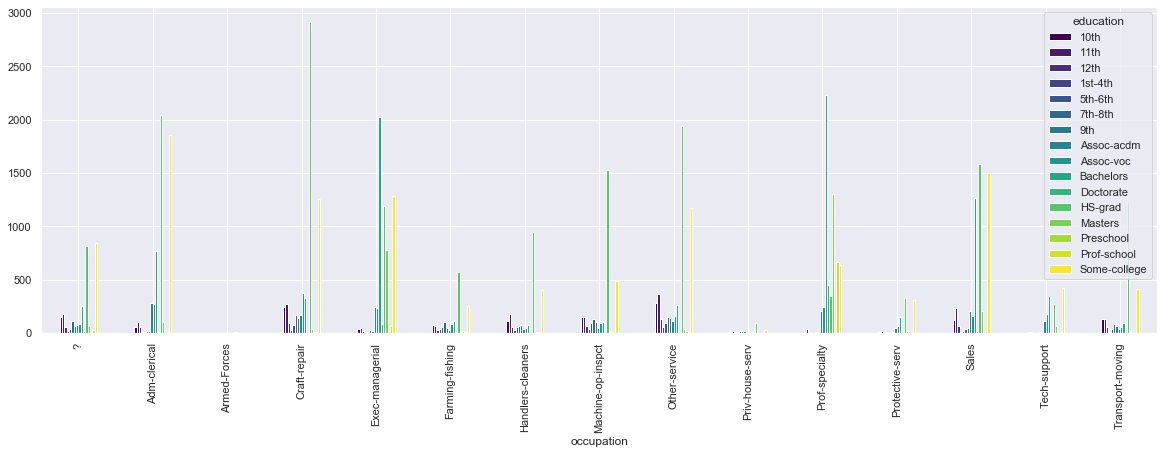

In [78]:
census_data.groupby(['occupation', 'education'])['income'].count().unstack().plot(kind='bar', colormap='viridis')
plt.show()

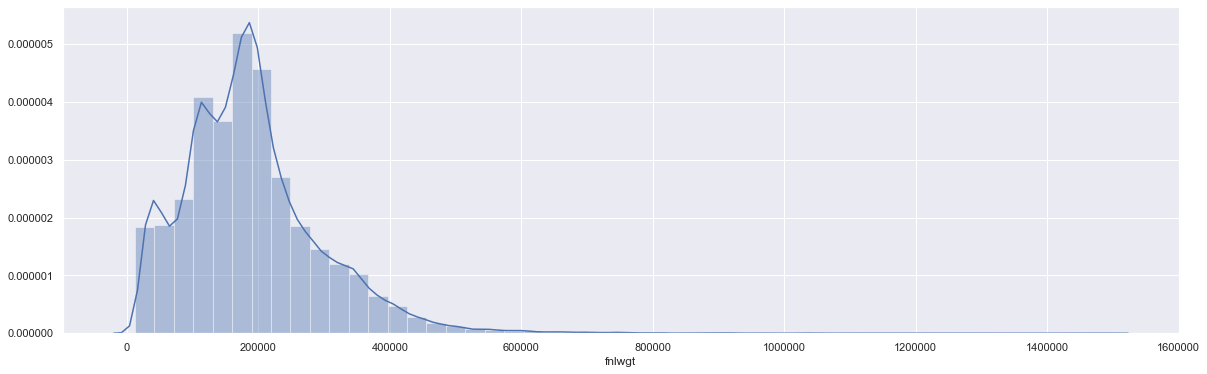

In [77]:
sns.distplot(census_data['fnlwgt'])
plt.show()

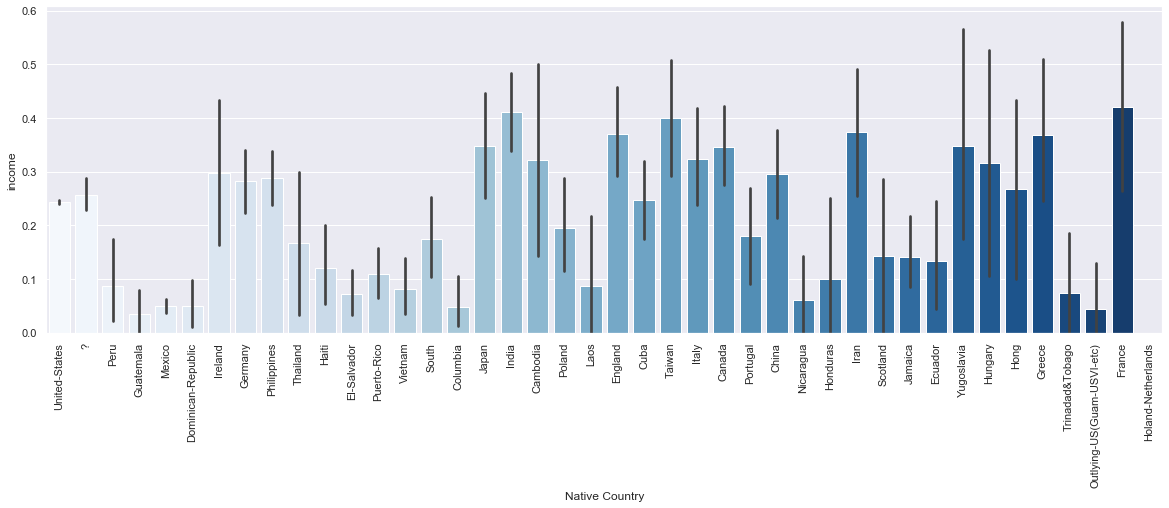

In [96]:
sns.set(rc={'figure.figsize':(20,6)})
sns.barplot(x='native-country', y='income', data=census_data, palette = 'Blues')
plt.xlabel('Native Country')
plt.xticks(rotation=90);